
# Random forests Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv('https://www.cse.chalmers.se/~richajo/dit866/data/adult_train.csv')
test_data = pd.read_csv('https://www.cse.chalmers.se/~richajo/dit866/data/adult_test.csv')

train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


**Encoding the features as numbers**
As seen, we have categorical features that need encoding. Here, we use DictVectorizer as it can handle both numerical and categorical data together. It applies one-hot encoding to categorical features. We transform to map from categorical values to column positions while performing the one-hot encoding on categorical features.

In [4]:
X_train = train_data.drop(columns=["target"])
y_train = train_data["target"]
X_test = test_data.drop(columns=["target"])
y_test = test_data["target"]
print("\nTrain Data:", X_train.shape)
print("Test Data:  ", X_test.shape)

train_dicts = X_train.to_dict(orient="records")
test_dicts = X_test.to_dict(orient="records")  # Convert df to dictionary lists
train_dicts[0]


Train Data: (32561, 13)
Test Data:   (16281, 13)


{'age': 27,
 'workclass': 'Private',
 'education': 'Some-college',
 'education-num': 10,
 'marital-status': 'Divorced',
 'occupation': 'Adm-clerical',
 'relationship': 'Unmarried',
 'race': 'White',
 'sex': 'Female',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 44,
 'native-country': 'United-States'}

In [5]:
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(train_dicts)
X_test_encoded = dv.transform(test_dicts)

print("\nTrain Data:", X_train_encoded.shape)
print("Test Data:  ", X_test_encoded.shape)
print(dv.feature_names_)


Train Data: (32561, 107)
Test Data:   (16281, 107)
['age', 'capital-gain', 'capital-loss', 'education-num', 'education=10th', 'education=11th', 'education=12th', 'education=1st-4th', 'education=5th-6th', 'education=7th-8th', 'education=9th', 'education=Assoc-acdm', 'education=Assoc-voc', 'education=Bachelors', 'education=Doctorate', 'education=HS-grad', 'education=Masters', 'education=Preschool', 'education=Prof-school', 'education=Some-college', 'hours-per-week', 'marital-status=Divorced', 'marital-status=Married-AF-spouse', 'marital-status=Married-civ-spouse', 'marital-status=Married-spouse-absent', 'marital-status=Never-married', 'marital-status=Separated', 'marital-status=Widowed', 'native-country=?', 'native-country=Cambodia', 'native-country=Canada', 'native-country=China', 'native-country=Columbia', 'native-country=Cuba', 'native-country=Dominican-Republic', 'native-country=Ecuador', 'native-country=El-Salvador', 'native-country=England', 'native-country=France', 'native-countr

The dataset originally had 14 columns but expanded to 108 due to one-hot encoding (including y).

In [6]:
# Pipeline combines the preprocessing and the model (RF classifier), while transforming the data
pipeline = make_pipeline(
    DictVectorizer(),  # One-hot encoding
    RandomForestClassifier(n_estimators=100, random_state=0)  # Train RF classifier
)

pipeline.fit(X_train.to_dict(orient="records"), y_train)
y_pred = pipeline.predict(X_test.to_dict(orient="records"))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8456


In [7]:
# ascertain accuracy using cross validation
cv_scores = cross_val_score(pipeline, X_train.to_dict(orient="records"), y_train, cv=5)
print(f"CV accuracy: {cv_scores.mean():.4f}")

CV accuracy: 0.8464


# Decision trees vs random forests

Depth: 1 | Train Accuracy: 0.7592 | Test Accuracy: 0.7638
Depth: 2 | Train Accuracy: 0.8282 | Test Accuracy: 0.8307
Depth: 3 | Train Accuracy: 0.8439 | Test Accuracy: 0.8448
Depth: 4 | Train Accuracy: 0.8439 | Test Accuracy: 0.8448
Depth: 5 | Train Accuracy: 0.8520 | Test Accuracy: 0.8523
Depth: 6 | Train Accuracy: 0.8571 | Test Accuracy: 0.8575
Depth: 7 | Train Accuracy: 0.8584 | Test Accuracy: 0.8568
Depth: 8 | Train Accuracy: 0.8606 | Test Accuracy: 0.8571
Depth: 9 | Train Accuracy: 0.8639 | Test Accuracy: 0.8585
Depth: 10 | Train Accuracy: 0.8694 | Test Accuracy: 0.8609
Depth: 11 | Train Accuracy: 0.8737 | Test Accuracy: 0.8595
Depth: 12 | Train Accuracy: 0.8779 | Test Accuracy: 0.8585
Depth: 13 | Train Accuracy: 0.8841 | Test Accuracy: 0.8527
Depth: 14 | Train Accuracy: 0.8901 | Test Accuracy: 0.8495
Depth: 15 | Train Accuracy: 0.8975 | Test Accuracy: 0.8494


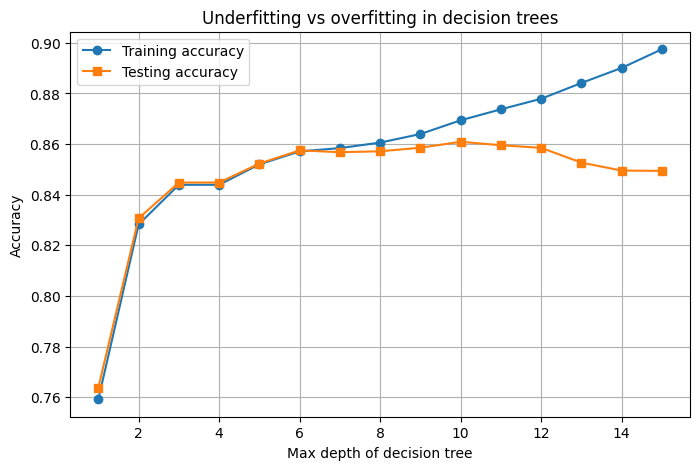

In [8]:
# Underfitting and overfitting in decision tree classifiers

max_depths = range(1, 16) # depths for testing
train_accuracies = []
test_accuracies = []

# plot accuracies for these tree depths
for depth in max_depths:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree_model.fit(X_train_encoded, y_train)
    y_train_pred = tree_model.predict(X_train_encoded)
    y_test_pred = tree_model.predict(X_test_encoded)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"Depth: {depth} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(max_depths, train_accuracies, label="Training accuracy", marker="o")
plt.plot(max_depths, test_accuracies, label="Testing accuracy", marker="s")
plt.xlabel("Max depth of decision tree")
plt.ylabel("Accuracy")
plt.title("Underfitting vs overfitting in decision trees")
plt.legend()
plt.grid()
plt.show()

For the decision tree, the model can underfit if its too shallow (1 to 2), and overfit if its too deep (8 to beyond).
Next, we check similarly for Random Forest Classifier, while varying the number of trees with diff. max_depth values and plot performance.


Training RF with 1 trees...

Depth: 1 | Train accuracy: 0.7675 | Test accuracy: 0.7718
Depth: 2 | Train accuracy: 0.7675 | Test accuracy: 0.7718
Depth: 3 | Train accuracy: 0.7792 | Test accuracy: 0.7831
Depth: 4 | Train accuracy: 0.7920 | Test accuracy: 0.7956
Depth: 5 | Train accuracy: 0.7840 | Test accuracy: 0.7861
Depth: 6 | Train accuracy: 0.7823 | Test accuracy: 0.7815
Depth: 7 | Train accuracy: 0.8132 | Test accuracy: 0.8130
Depth: 8 | Train accuracy: 0.8080 | Test accuracy: 0.8061
Depth: 9 | Train accuracy: 0.8289 | Test accuracy: 0.8277
Depth: 10 | Train accuracy: 0.8378 | Test accuracy: 0.8350
Depth: 11 | Train accuracy: 0.8281 | Test accuracy: 0.8211
Depth: 12 | Train accuracy: 0.8395 | Test accuracy: 0.8323
Depth: 13 | Train accuracy: 0.8468 | Test accuracy: 0.8304
Depth: 14 | Train accuracy: 0.8414 | Test accuracy: 0.8265
Depth: 15 | Train accuracy: 0.8537 | Test accuracy: 0.8306


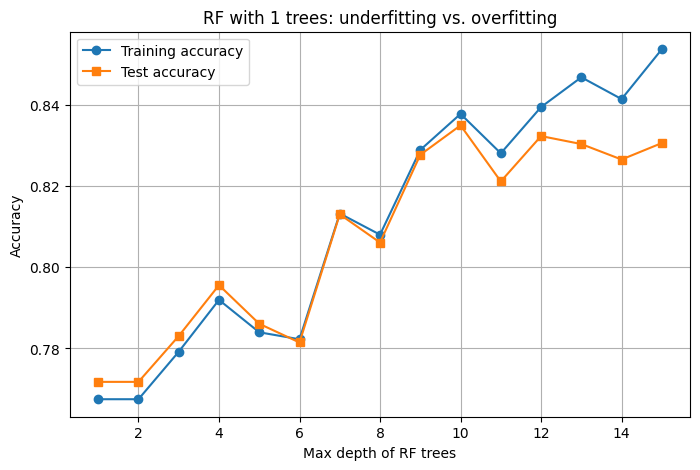


Training RF with 5 trees...

Depth: 1 | Train accuracy: 0.7629 | Test accuracy: 0.7675
Depth: 2 | Train accuracy: 0.7782 | Test accuracy: 0.7816
Depth: 3 | Train accuracy: 0.7842 | Test accuracy: 0.7866
Depth: 4 | Train accuracy: 0.8100 | Test accuracy: 0.8141
Depth: 5 | Train accuracy: 0.8234 | Test accuracy: 0.8248
Depth: 6 | Train accuracy: 0.8361 | Test accuracy: 0.8351
Depth: 7 | Train accuracy: 0.8440 | Test accuracy: 0.8440
Depth: 8 | Train accuracy: 0.8522 | Test accuracy: 0.8485
Depth: 9 | Train accuracy: 0.8492 | Test accuracy: 0.8467
Depth: 10 | Train accuracy: 0.8584 | Test accuracy: 0.8525
Depth: 11 | Train accuracy: 0.8612 | Test accuracy: 0.8525
Depth: 12 | Train accuracy: 0.8639 | Test accuracy: 0.8528
Depth: 13 | Train accuracy: 0.8682 | Test accuracy: 0.8528
Depth: 14 | Train accuracy: 0.8748 | Test accuracy: 0.8553
Depth: 15 | Train accuracy: 0.8780 | Test accuracy: 0.8540


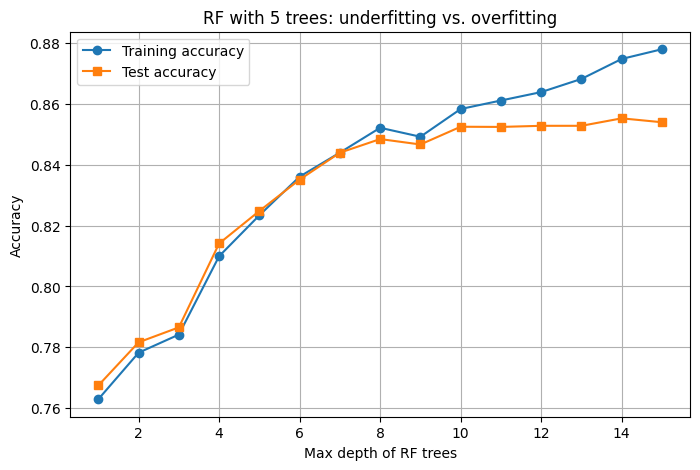


Training RF with 10 trees...

Depth: 1 | Train accuracy: 0.7629 | Test accuracy: 0.7674
Depth: 2 | Train accuracy: 0.7804 | Test accuracy: 0.7840
Depth: 3 | Train accuracy: 0.8045 | Test accuracy: 0.8060
Depth: 4 | Train accuracy: 0.8195 | Test accuracy: 0.8199
Depth: 5 | Train accuracy: 0.8360 | Test accuracy: 0.8352
Depth: 6 | Train accuracy: 0.8450 | Test accuracy: 0.8447
Depth: 7 | Train accuracy: 0.8446 | Test accuracy: 0.8436
Depth: 8 | Train accuracy: 0.8546 | Test accuracy: 0.8514
Depth: 9 | Train accuracy: 0.8570 | Test accuracy: 0.8550
Depth: 10 | Train accuracy: 0.8615 | Test accuracy: 0.8574
Depth: 11 | Train accuracy: 0.8618 | Test accuracy: 0.8546
Depth: 12 | Train accuracy: 0.8661 | Test accuracy: 0.8577
Depth: 13 | Train accuracy: 0.8708 | Test accuracy: 0.8567
Depth: 14 | Train accuracy: 0.8762 | Test accuracy: 0.8611
Depth: 15 | Train accuracy: 0.8817 | Test accuracy: 0.8581


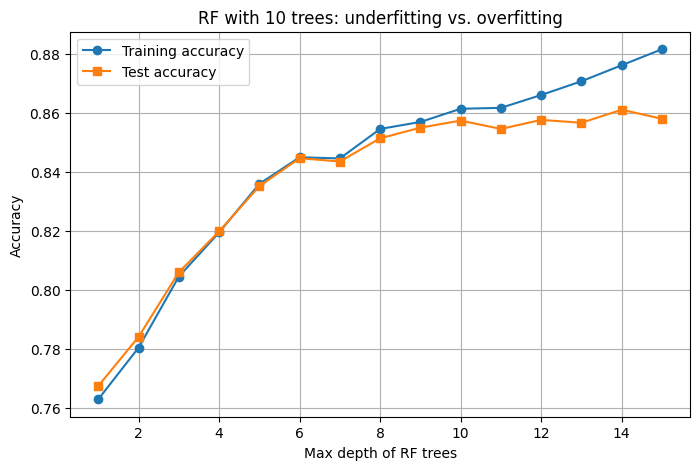


Training RF with 50 trees...

Depth: 1 | Train accuracy: 0.7592 | Test accuracy: 0.7638
Depth: 2 | Train accuracy: 0.7704 | Test accuracy: 0.7737
Depth: 3 | Train accuracy: 0.7921 | Test accuracy: 0.7961
Depth: 4 | Train accuracy: 0.8261 | Test accuracy: 0.8264
Depth: 5 | Train accuracy: 0.8368 | Test accuracy: 0.8343
Depth: 6 | Train accuracy: 0.8456 | Test accuracy: 0.8444
Depth: 7 | Train accuracy: 0.8468 | Test accuracy: 0.8460
Depth: 8 | Train accuracy: 0.8548 | Test accuracy: 0.8522
Depth: 9 | Train accuracy: 0.8582 | Test accuracy: 0.8548
Depth: 10 | Train accuracy: 0.8620 | Test accuracy: 0.8560
Depth: 11 | Train accuracy: 0.8674 | Test accuracy: 0.8595
Depth: 12 | Train accuracy: 0.8700 | Test accuracy: 0.8595
Depth: 13 | Train accuracy: 0.8739 | Test accuracy: 0.8605
Depth: 14 | Train accuracy: 0.8782 | Test accuracy: 0.8620
Depth: 15 | Train accuracy: 0.8836 | Test accuracy: 0.8610


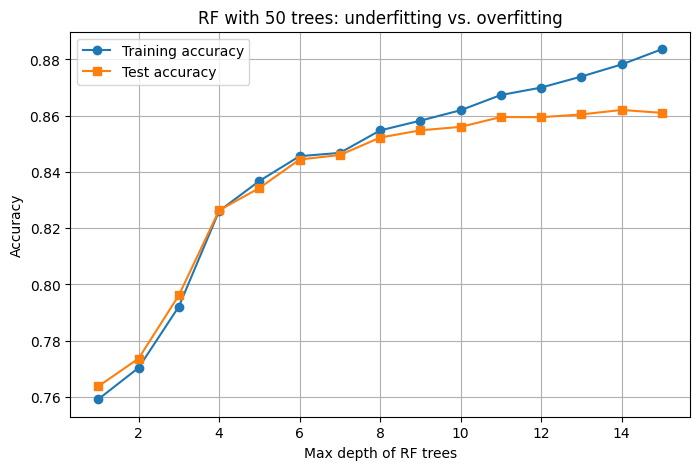


Training RF with 100 trees...

Depth: 1 | Train accuracy: 0.7592 | Test accuracy: 0.7638
Depth: 2 | Train accuracy: 0.7704 | Test accuracy: 0.7735
Depth: 3 | Train accuracy: 0.7976 | Test accuracy: 0.8004
Depth: 4 | Train accuracy: 0.8311 | Test accuracy: 0.8302
Depth: 5 | Train accuracy: 0.8373 | Test accuracy: 0.8359
Depth: 6 | Train accuracy: 0.8448 | Test accuracy: 0.8429
Depth: 7 | Train accuracy: 0.8490 | Test accuracy: 0.8482
Depth: 8 | Train accuracy: 0.8549 | Test accuracy: 0.8519
Depth: 9 | Train accuracy: 0.8592 | Test accuracy: 0.8558
Depth: 10 | Train accuracy: 0.8626 | Test accuracy: 0.8565
Depth: 11 | Train accuracy: 0.8668 | Test accuracy: 0.8589
Depth: 12 | Train accuracy: 0.8697 | Test accuracy: 0.8604
Depth: 13 | Train accuracy: 0.8736 | Test accuracy: 0.8609
Depth: 14 | Train accuracy: 0.8784 | Test accuracy: 0.8619
Depth: 15 | Train accuracy: 0.8834 | Test accuracy: 0.8619


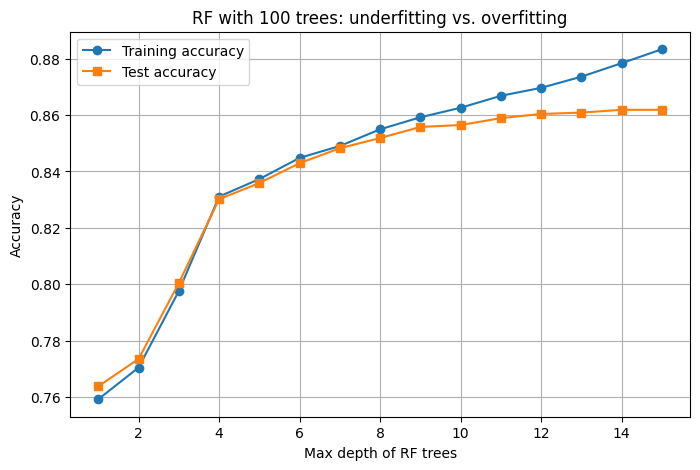


Training RF with 200 trees...

Depth: 1 | Train accuracy: 0.7592 | Test accuracy: 0.7638
Depth: 2 | Train accuracy: 0.7694 | Test accuracy: 0.7728
Depth: 3 | Train accuracy: 0.7888 | Test accuracy: 0.7923
Depth: 4 | Train accuracy: 0.8241 | Test accuracy: 0.8229
Depth: 5 | Train accuracy: 0.8382 | Test accuracy: 0.8370
Depth: 6 | Train accuracy: 0.8455 | Test accuracy: 0.8431
Depth: 7 | Train accuracy: 0.8506 | Test accuracy: 0.8489
Depth: 8 | Train accuracy: 0.8552 | Test accuracy: 0.8531
Depth: 9 | Train accuracy: 0.8614 | Test accuracy: 0.8575
Depth: 10 | Train accuracy: 0.8639 | Test accuracy: 0.8585
Depth: 11 | Train accuracy: 0.8677 | Test accuracy: 0.8598
Depth: 12 | Train accuracy: 0.8705 | Test accuracy: 0.8608
Depth: 13 | Train accuracy: 0.8744 | Test accuracy: 0.8612
Depth: 14 | Train accuracy: 0.8783 | Test accuracy: 0.8619
Depth: 15 | Train accuracy: 0.8828 | Test accuracy: 0.8622


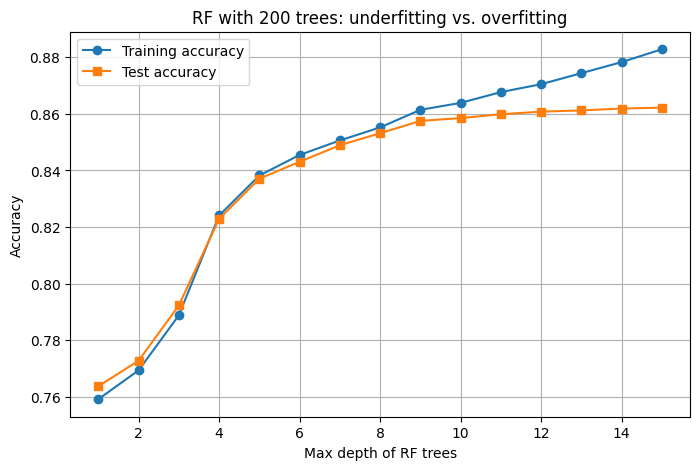

In [9]:
# Similarly, we test for Random Forest Classifier depth/trees (ensembles)
n_estimators_values = [1, 5, 10, 50, 100, 200]

for n_trees in n_estimators_values:
    train_accuracies = []
    test_accuracies = []
    print(f"\nTraining RF with {n_trees} trees...\n")
    for depth in max_depths:
        rf_model = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, random_state=0, n_jobs=-1)
        rf_model.fit(X_train_encoded, y_train)
        y_train_pred = rf_model.predict(X_train_encoded)
        y_test_pred = rf_model.predict(X_test_encoded)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        print(f"Depth: {depth} | Train accuracy: {train_acc:.4f} | Test accuracy: {test_acc:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(max_depths, train_accuracies, label="Training accuracy", marker="o")
    plt.plot(max_depths, test_accuracies, label="Test accuracy", marker="s")
    plt.xlabel("Max depth of RF trees")
    plt.ylabel("Accuracy")
    plt.title(f"RF with {n_trees} trees: underfitting vs. overfitting")
    plt.legend()
    plt.grid()
    plt.show()

**What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?**
A. The decision tree curve shows an overfitting trend, while the RF shows a similar trend as decision trees- but it randomness (bootstrap).
Rf is similar to a single decision tree, as it overfits as depth increases.

**What happens with the curve for random forests as the ensemble size grows?**
As the number of trees (n_estimators) increase, overfitting in RF decreases because of averaging reducing variance. A larger ensemble smooths the curve, preventing overfitting while keeping high performance.


**What happens with the best observed test set accuracy as the ensemble size grows?**
Test accuracy increases rapidly at first with higher accuracy gains, and then slows down after a point. INitially averaging trees reduces variance, improving generalisation. But after a point, it just increases computation, without helping with accuracy.


**What happens with the training time as the ensemble size grows?**
Training time increases linearly with the number of trees. However, as RF trees are independent, so they can be trained in parallel across CPU cores. This Parallelization (n_jobs=-1) is crucial for large ensembles.

# Feature importance in RF classifiers

Each feature’s importance is computed based on how much it improves purity (reduces impurity) across all trees.

In [10]:
dv = pipeline.steps[0][1]
rf_model = pipeline.steps[1][1]
feature_names = dv.feature_names_

# feature importances - trained RF model
importances = rf_model.feature_importances_
feature_importance = list(zip(feature_names, importances))
sorted_features = sorted(feature_importance, key=lambda x: x[1], reverse=True)

print("Importance of Features:")
for feature, importance in sorted_features[:15]:  print(f"{feature}: {importance:.4f}")

Importance of Features:
age: 0.2263
hours-per-week: 0.1145
capital-gain: 0.1029
education-num: 0.0667
marital-status=Married-civ-spouse: 0.0596
relationship=Husband: 0.0503
capital-loss: 0.0338
marital-status=Never-married: 0.0267
occupation=Exec-managerial: 0.0200
occupation=Prof-specialty: 0.0162
relationship=Not-in-family: 0.0127
education=Bachelors: 0.0125
workclass=Private: 0.0115
relationship=Own-child: 0.0114
sex=Male: 0.0108


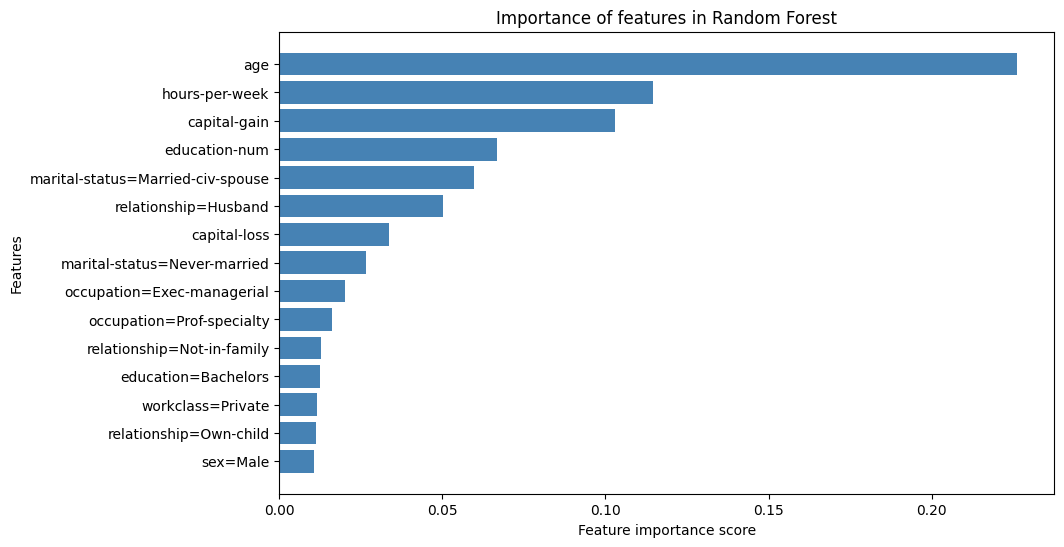

In [11]:
top_features = sorted_features[:15]   # top 15 features
top_names, top_importances = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(top_names[::-1], top_importances[::-1], color="steelblue")
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Importance of features in Random Forest")
plt.show()

We have other methods to compute the feature importances apart from the one executed above, which is derived from Impurity based (GINI) method. The permutation based feature importance method is more versatile and reflects less bias although being computationally intensive.

Other methods such as SHAP (SHapely Additive exPlainations) although computationally complex, are great at visualising and measuring individual features' contribution to prediction, and at handling correlations between features. Similarly, we have LIME (Local Interpretable Model agnostic Explaination), which is useful for explaining specific predictions, with a simpler interpretable model.

Overall, decision trees arent fantastic, RF outperforms them in terms of generalization due to its property of reducing overfit by averaging over multiple trees, while improving accuracy. HPO is critical to further improve accuracy, while the feature importance methods help interpret the models.
